In [3]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression



## BASIC EDA

In [4]:
# Load the dataset
df = pd.read_csv('jamb_survey_cleaned.csv')

In [5]:
# Display first few rows
df.head()

,Gender,Age,Exam_Year,State,School_Type,Highest_Score,Prep_Method,Prep_Challenges,Confidence_Level,Difficult_Subject,CBT_Familiarity,Exam_Day_Challenges,Center_Facilities_Rating,Technical_Issues,Prep_Improvement,Success
0,Female,16 - 17,2022,Kwara,Private,205,"Used online platforms (e.g., YouTube, CBT apps)",No access to coaching centers,3,Chemistry,Yes,NaN,4,No technical problems,Study group and good foundation in the core su...,True
1,Female,18 - 19,2022,Kwara,Private,362,"Attended coaching centers, Used online platfor...","Poor time management,",4,Physics,No,"Technical issues (e.g., computer malfunction, ...",2,Computer malfunction,NaN,True
2,Male,22 years or Older,2022,Kwara,Private,210,Studied independently,"No access to coaching centers, Lack of motivat...",3,Physics,Yes,"Delay in starting the exam, Poor ventilation o...",3,NaN,Having friends with similar goal around me,True
3,Male,16 - 17,2021,Kwara,Private,212,Studied independently,"Lack of motivation, Poor time management,",3,Physics,No,"Delay in starting the exam, Poor ventilation o...",2,Not at all,Motivation,True
4,Male,16 - 17,2025,Lagos,Private,273,Studied independently,No access to coaching centers,4,PHYSICS,Yes,NaN,5,I encountered none,Attending Coaching Classes,True


In [6]:
# Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    54 non-null     object
 1   Age                       54 non-null     object
 2   Exam_Year                 54 non-null     int64 
 3   State                     54 non-null     object
 4   School_Type               54 non-null     object
 5   Highest_Score             54 non-null     int64 
 6   Prep_Method               54 non-null     object
 7   Prep_Challenges           54 non-null     object
 8   Confidence_Level          54 non-null     int64 
 9   Difficult_Subject         51 non-null     object
 10  CBT_Familiarity           54 non-null     object
 11  Exam_Day_Challenges       43 non-null     object
 12  Center_Facilities_Rating  54 non-null     int64 
 13  Technical_Issues          39 non-null     object
 14  Prep_Improvement          51

In [7]:
# Summary statistics
df.describe()

,Exam_Year,Highest_Score,Confidence_Level,Center_Facilities_Rating
count,54.000000,54.000000,54.000000,54.000000
mean,2022.500000,224.907407,3.370370,3.629630
std,1.850548,47.272501,0.759749,0.977025
min,2020.000000,150.000000,2.000000,2.000000
25%,2021.000000,199.250000,3.000000,3.000000
50%,2022.000000,211.000000,3.000000,4.000000
75%,2024.000000,240.750000,4.000000,4.000000
max,2025.000000,362.000000,5.000000,5.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

Gender                       0
Age                          0
Exam_Year                    0
State                        0
School_Type                  0
Highest_Score                0
Prep_Method                  0
Prep_Challenges              0
Confidence_Level             0
Difficult_Subject            3
CBT_Familiarity              0
Exam_Day_Challenges         11
Center_Facilities_Rating     0
Technical_Issues            15
Prep_Improvement             3
Success                      0
dtype: int64


In [9]:
# Convert categorical School_Type to binary for analysis
df['School_Type_Binary'] = df['School_Type'].map({'Public': 1, 'Private': 0})


In [10]:
df.head()

,Gender,Age,Exam_Year,State,School_Type,Highest_Score,Prep_Method,Prep_Challenges,Confidence_Level,Difficult_Subject,CBT_Familiarity,Exam_Day_Challenges,Center_Facilities_Rating,Technical_Issues,Prep_Improvement,Success,School_Type_Binary
0,Female,16 - 17,2022,Kwara,Private,205,"Used online platforms (e.g., YouTube, CBT apps)",No access to coaching centers,3,Chemistry,Yes,NaN,4,No technical problems,Study group and good foundation in the core su...,True,0
1,Female,18 - 19,2022,Kwara,Private,362,"Attended coaching centers, Used online platfor...","Poor time management,",4,Physics,No,"Technical issues (e.g., computer malfunction, ...",2,Computer malfunction,NaN,True,0
2,Male,22 years or Older,2022,Kwara,Private,210,Studied independently,"No access to coaching centers, Lack of motivat...",3,Physics,Yes,"Delay in starting the exam, Poor ventilation o...",3,NaN,Having friends with similar goal around me,True,0
3,Male,16 - 17,2021,Kwara,Private,212,Studied independently,"Lack of motivation, Poor time management,",3,Physics,No,"Delay in starting the exam, Poor ventilation o...",2,Not at all,Motivation,True,0
4,Male,16 - 17,2025,Lagos,Private,273,Studied independently,No access to coaching centers,4,PHYSICS,Yes,NaN,5,I encountered none,Attending Coaching Classes,True,0


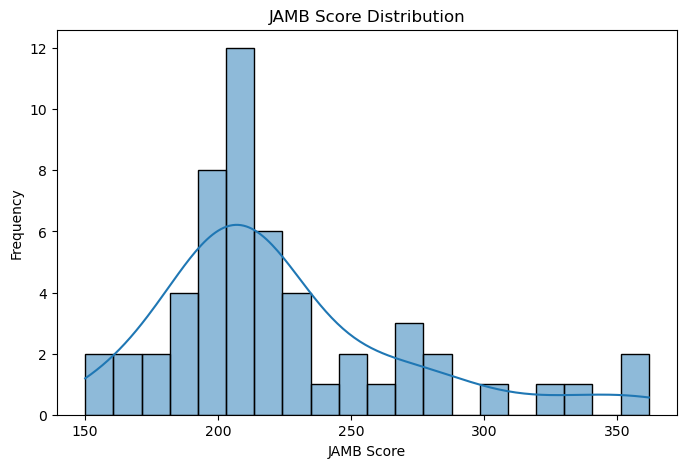

In [11]:
# JAMB Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Highest_Score'], bins=20, kde=True)
plt.title('JAMB Score Distribution')
plt.xlabel('JAMB Score')
plt.ylabel('Frequency')
plt.show()

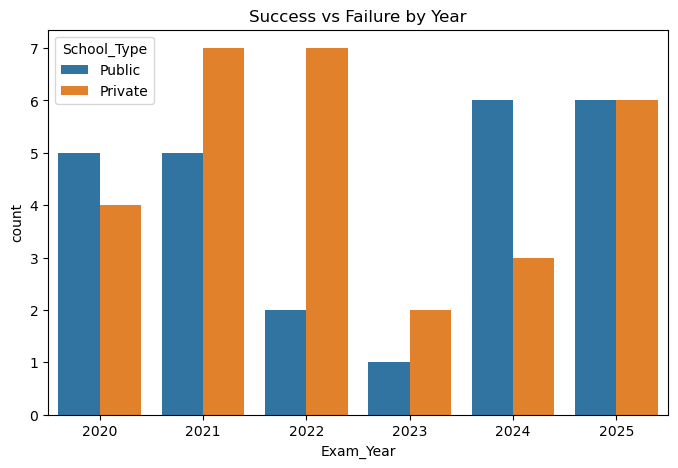

In [13]:
# Success rate across years
plt.figure(figsize=(8, 5))
sns.countplot(x='Exam_Year', hue='School_Type', data=df)
plt.title('Success vs Failure by Year')
plt.show()

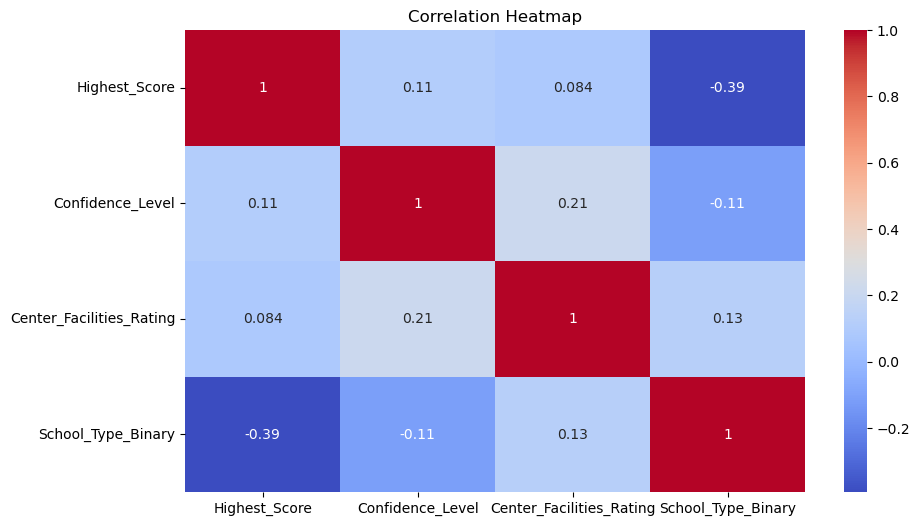

In [19]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Highest_Score', 'Confidence_Level', 
                'Center_Facilities_Rating',
                'School_Type_Binary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## PREDICTIVE MODELLING


Predict whether a student will meet the JAMB cutoff based on their background, study habits, etc.

### USING LOGISTIC REGRESSION

In [21]:
# Select numeric features for simplicity
features = ['Highest_Score', 'Confidence_Level', 'Center_Facilities_Rating']

X = df[features]
y = df['School_Type_Binary']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6363636363636364

Confusion Matrix:
 [[3 3]
 [1 4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



### USING RANDOM FOREST CLASSIFIER

In [28]:
# Define features
features = [
    'Highest_Score', 'Confidence_Level', 'Center_Facilities_Rating',
    'Prep_Method', 'Prep_Improvement', 'Difficult_Subject',
    'Prep_Challenges', 'School_Type', 'State', 'Exam_Day_Challenges'
]

X = df[features]
y = df['School_Type_Binary']


In [32]:
# Convert Yes/No to binary
binary_cols = ['CBT_Familiarity']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0, 'Maybe':0.5}).fillna(0)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# One-hot encode columns with few categories
cat_cols = ['Gender', 'School_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## PREDICTING FUTURE TRENDS(2026-2030)

In [47]:
# Group by year to get pass rate
yearly_data = df.groupby('Exam_Year')['School_Type_Binary'].mean().reset_index()
yearly_data.rename(columns={'School_Type_Binary': 'Pass_Rate'}, inplace=True)

print(yearly_data)


   Exam_Year  Pass_Rate
0       2020   0.555556
1       2021   0.416667
2       2022   0.222222
3       2023   0.333333
4       2024   0.666667
5       2025   0.500000


In [48]:
# Prepare data for regression
X_years = yearly_data['Exam_Year'].values.reshape(-1, 1)
y_pass_rate = yearly_data['Pass_Rate'].values

In [49]:
# Train linear regression model
model = LinearRegression()
model.fit(X_years, y_pass_rate)


LinearRegression()

In [50]:
# Predict for 2026–2030
future_years = np.array([2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
future_pass_rate = model.predict(future_years)


In [51]:
# Combine results
forecast = pd.DataFrame({
    'Exam_Year': future_years.flatten(),
    'Predicted_Pass_Rate': future_pass_rate
})

print("\nForecast:")
print(forecast)


Forecast:
   Exam_Year  Predicted_Pass_Rate
0       2026             0.507407
1       2027             0.524074
2       2028             0.540741
3       2029             0.557407
4       2030             0.574074


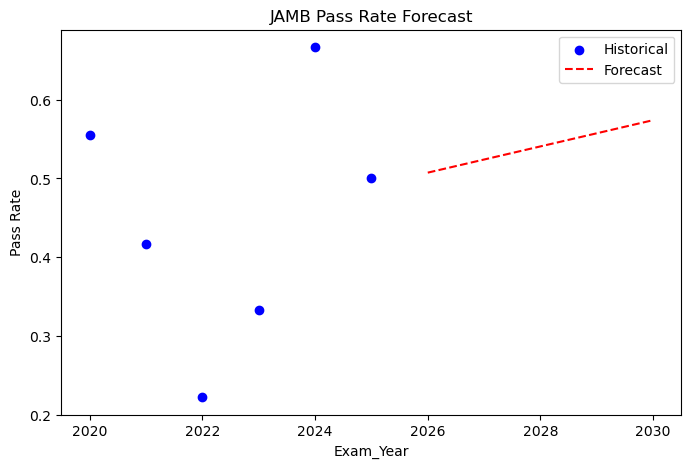

In [52]:
# Plot
plt.figure(figsize=(8,5))
plt.scatter(yearly_data['Exam_Year'], yearly_data['Pass_Rate'], color='blue', label='Historical')
plt.plot(future_years, future_pass_rate, color='red', linestyle='--', label='Forecast')
plt.xlabel('Exam_Year')
plt.ylabel('Pass Rate')
plt.title('JAMB Pass Rate Forecast')
plt.legend()
plt.show()